<a href="https://colab.research.google.com/github/AnthonyBurton-Cordova/Machine-Learning-2/blob/main/Class%205%20-%20LogisticRegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import requests
import numpy as np

resp = requests.get('https://raw.githubusercontent.com/gchoi/Dataset/master/weatherAUS.csv')
data = list(csv.reader(resp.text.split('\n')))
col_names = data[0]
data = data[1:-1]

float_cols = col_names[2:7]+ col_names[11:21]
float_data = [x[2:7]+ x[11:21] for x in data]
float_data = np.array([[float(entry) if entry != 'NA' else 0 for entry in row] for row in float_data])

M = float_data
#L = float_data[:,-1]
#avg_temp = np.mean(L)
#L = [0 if x<avg_temp else 1 for x in L]

L = [1 if x[-1]=='Yes' else 0 for x in data]


###### require zero mean and unit variance
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(M)
M_scaled = scaler.transform(M)


### Test code functions(not for error estimation)
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(M_scaled, L)
clf.score(M_scaled, L)


0.8263333423714108

In [3]:
### quick test(simple error estimation)
clf = LogisticRegression()
clf.fit(M_scaled[:20000], L[:20000])
clf.score(M_scaled[20000:], L[20000:])

0.8215745512706594

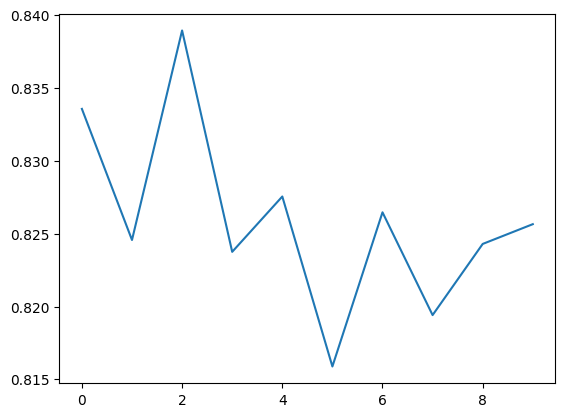

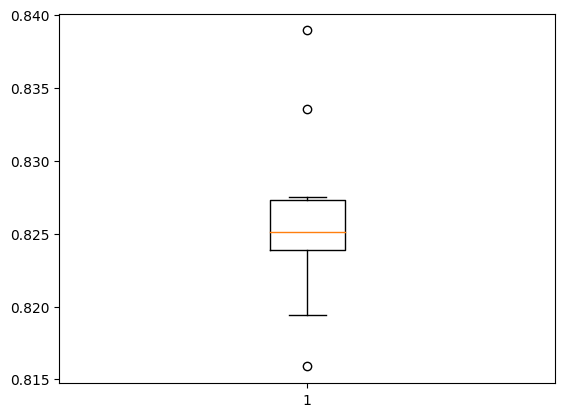

In [4]:
### Real reporting (rigerous error estimation)
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, M_scaled, L, cv=10)

#Scores
import  matplotlib.pyplot as plt
plt.plot(scores)
plt.show()

# Box Plot
plt.boxplot(scores)
plt.show()


In [ ]:
### Test code functions(simple error estimation)
from sklearn.model_selection import GridSearchCV
params = dict([['penalty',['l2']], ['C',[.001, .01, .1, .25, .5, 1]]])
lr = LogisticRegression()
clf = GridSearchCV(lr, params)
clf.fit(M_scaled[:20000], L[:20000])
clf.cv_results_['mean_test_score']

clf.cv_results_['params'][3]
lr = LogisticRegression( **clf.cv_results_['params'][3])
lr.fit(M_scaled[20000:], L[20000:])
lr.score(M_scaled[:20000], L[:20000])

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='sigmoid', input_shape=(M_scaled.shape[1],)),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(1, activation='sigmoid')])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(M_scaled[:20000], np.array(L[:20000]), epochs=100, verbose=1)
pred = model.predict(M_scaled[20000:])

from collections import Counter
ret = Counter(zip(np.round(pred).T[0], L[20000:]))
1 - ((ret[(1.0, 0)]+ret[(0, 1.0)])/len(L[20000:]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(M_scaled, L)
clf.score(M_scaled, L)
list(zip(float_cols,clf.feature_importances_))

In [ ]:
np.corrcoef(M_scaled[:,8],L)
plt.scatter(M_scaled[:,8],L)
plt.show()


In [ ]:
#https://github.com/google-research/tuning_playbook/blob/main/README.md#choosing-the-optimizer
